In [31]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import f1_score

In [20]:
!pip install wget
!pip install --upgrade vaderSentiment

import pandas as pd
import numpy as np
import importlib

import gru_data_pipeline as gdp
importlib.reload(gdp)

import gru_model as gru
importlib.reload(gru)

import etl
importlib.reload(etl)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<module 'etl' from '/content/etl.py'>

In [8]:
etl.main(is_dataset_new = False, upload = False)

/content/etl.py:131: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda x: BeautifulSoup(x, 'html.parser').get_text())


  0%|          | 0/1783641 [00:00<?, ?it/s]

/content/etl.py:131: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda x: BeautifulSoup(x, 'html.parser').get_text())


  0%|          | 0/940310 [00:00<?, ?it/s]

In [9]:
x_train, x_test, y_train, y_test, embedding_matrix, num_tokens = gdp.main(False, False)

./dataset/nyc_test.csv
./dataset/nyc_train.csv
./dataset/london_train.csv
./dataset/london_test.csv


In [10]:
history, model = gru.main(x_train, y_train.values.reshape((-1,1)), embedding_matrix, num_tokens)

Epoch 1/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7652 - loss: 0.4378 - val_accuracy: 0.9424 - val_loss: 0.1561
Epoch 2/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9429 - loss: 0.1543 - val_accuracy: 0.9517 - val_loss: 0.1283
Epoch 3/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9541 - loss: 0.1212 - val_accuracy: 0.9520 - val_loss: 0.1237
Epoch 4/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9630 - loss: 0.0991 - val_accuracy: 0.9601 - val_loss: 0.1099
Epoch 5/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9687 - loss: 0.0850 - val_accuracy: 0.9599 - val_loss: 0.1063
Epoch 6/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9745 - loss: 0.0701 - val_accuracy: 0.9618 - val_loss: 0.1130
Epoch 7/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9813 - loss: 0.0535 - val_accuracy: 0.9604 - val_loss: 0.1237
Epoch 8/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9860 

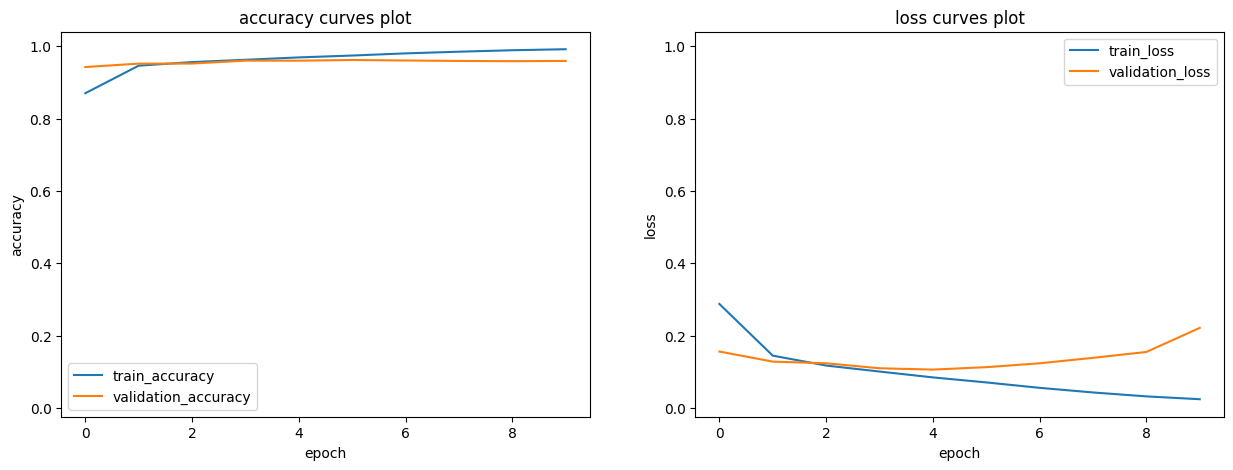

In [11]:
gru.show_learning_curves(history)

## Model Evaluation

In [12]:
model.evaluate(x_test, y_test.values.reshape((-1,1)))

15551/15551 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9561 - loss: 0.2458


[0.24976521730422974, 0.9559947848320007]

In [13]:
y_pred_train = np.round(model.predict(x_train))
balanced_accuracy_score(y_train, y_pred_train)

5884/5884 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


0.9889208740081368

In [14]:
y_pred_test = np.round(model.predict(x_test))
balanced_accuracy_score(y_test, y_pred_test)

15551/15551 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step


0.959763568701264

In [15]:
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.52      0.96      0.67     23535
    positive       1.00      0.96      0.98    474088

    accuracy                           0.96    497623
   macro avg       0.76      0.96      0.83    497623
weighted avg       0.98      0.96      0.96    497623



In [17]:
f1_score(y_test, y_pred_test, average='weighted')

0.9621228455846239

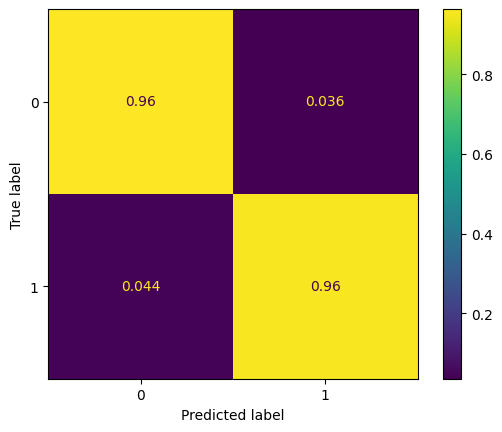

In [22]:
gru.plot_confusion(y_pred_test, y_test, normalize = "true")

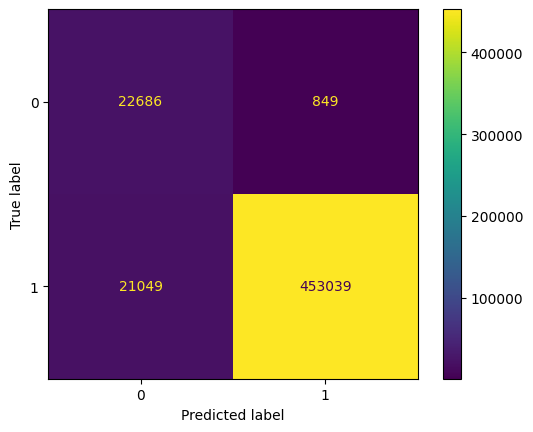

In [21]:
gru.plot_confusion(y_pred_test, y_test, normalize = None)

## Evaluation for the model pipeline where lemmatization and stop words removal are used.

In [24]:
x_train, x_test, y_train, y_test, embedding_matrix, num_tokens = gdp.main(True, True)

./dataset/nyc_test.csv
./dataset/nyc_train.csv
./dataset/london_train.csv
./dataset/london_test.csv


In [25]:
history, model = gru.main(x_train, y_train.values.reshape((-1,1)), embedding_matrix, num_tokens)

Epoch 1/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8007 - loss: 0.4319 - val_accuracy: 0.9110 - val_loss: 0.2389
Epoch 2/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9112 - loss: 0.2316 - val_accuracy: 0.9207 - val_loss: 0.2085
Epoch 3/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9259 - loss: 0.1980 - val_accuracy: 0.9264 - val_loss: 0.2024
Epoch 4/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9335 - loss: 0.1792 - val_accuracy: 0.9288 - val_loss: 0.1895
Epoch 5/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9394 - loss: 0.1626 - val_accuracy: 0.9295 - val_loss: 0.1953
Epoch 6/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9464 - loss: 0.1471 - val_accuracy: 0.9287 - val_loss: 0.1905
Epoch 7/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9536 - loss: 0.1284 - val_accuracy: 0.9265 - val_loss: 0.2055
Epoch 8/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9595 

In [27]:
y_pred_train = np.round(model.predict(x_train))
balanced_accuracy_score(y_train, y_pred_train)

5884/5884 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


0.9636024686374693

In [28]:
y_pred_test = np.round(model.predict(x_test))
balanced_accuracy_score(y_test, y_pred_test)

15551/15551 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step


0.9237579116805366

In [29]:
f1_score(y_test, y_pred_test, average='weighted')

0.9303843129673215

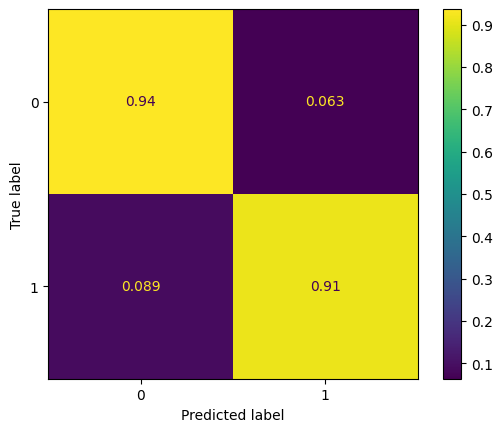

In [32]:
gru.plot_confusion(y_pred_test, y_test, normalize = "true")